/var/folders/7g/6h3kbb0x3g5097tf7r8_476r0000gn/T/ipykernel_22945/3855773691.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_sugar = yf.download(ticker, period="2y", progress=False)
/var/folders/7g/6h3kbb0x3g5097tf7r8_476r0000gn/T/ipykernel_22945/3855773691.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_close = float(df_sugar['Close'].iloc[-1])


 SPOT PRICE RETRIEVED: 14.73 Cents/lb


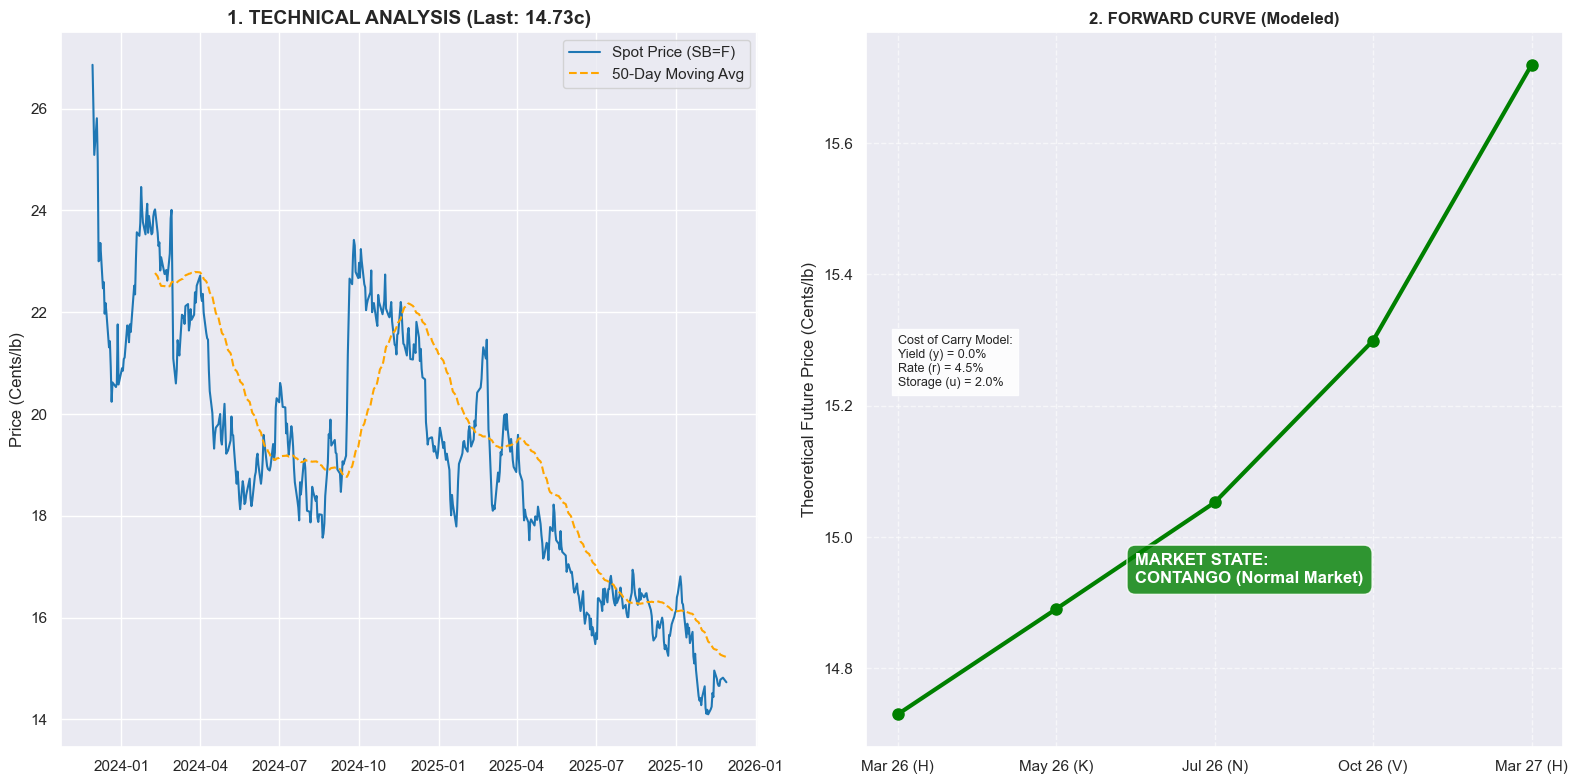

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PLOT STYLING 
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [16, 8]

#1. MARKET DATA RETRIEVAL (TREND ANALYSIS)

ticker = "SB=F"  # Sugar No.11 Futures

# Download 2 years of history
df_sugar = yf.download(ticker, period="2y", progress=False)

#ROBUST DATA EXTRACTION 
try:
    # Attempt to extract the float value directly
    last_close = float(df_sugar['Close'].iloc[-1])
except:
    # Fallback for multi-index formatting issues in new yfinance versions
    last_close = float(df_sugar['Close'].iloc[-1].iloc[0])

print(f" SPOT PRICE RETRIEVED: {last_close:.2f} Cents/lb")

# Calculate 50-Day Moving Average (Trend Indicator)
df_sugar['MA50'] = df_sugar['Close'].rolling(window=50).mean()

 
#2. QUANTITATIVE MODELING (COST OF CARRY) 
# Formula: F = S * exp((r + u - y) * t)

spot_price = last_close

#  MODEL HYPOTHESES (Calibrated for Low Price 15c) 
# At 15 cents, the market is well supplied (Not expensive).
# Therefore, there is NO scarcity, so Convenience Yield is 0%.
# The curve should go UP (Contango) to pay for storage.

r = 0.045   # Risk-Free Rate (approx. US Rates) -> 4.5%
u = 0.02    # Storage Cost per year -> 2%
y = 0.00    # CONVENIENCE YIELD -> 0% (Abundance / No shortage)

# Time to Maturity (in years)
# Spot=0, May=2m, Jul=4m, Oct=7m, Mar26=1y
t_years = np.array([0, 2/12, 4/12, 7/12, 12/12])
maturites = ['Mar 26 (H)', 'May 26 (K)', 'Jul 26 (N)', 'Oct 26 (V)', 'Mar 27 (H)']

# APPLYING THE FORMULA
theoretical_futures = spot_price * np.exp((r + u - y) * t_years)

#3. DASHBOARD VISUALIZATION

fig, (ax1, ax2) = plt.subplots(1, 2)

#CHART 1: HISTORICAL TREND
ax1.plot(df_sugar.index, df_sugar['Close'], label=f'Spot Price ({ticker})', color='#1f77b4', linewidth=1.5)
ax1.plot(df_sugar.index, df_sugar['MA50'], label='50-Day Moving Avg', color='orange', linestyle='--')
ax1.set_title(f"1. TECHNICAL ANALYSIS (Last: {spot_price:.2f}c)", fontweight='bold', fontsize=14)
ax1.set_ylabel("Price (Cents/lb)")
ax1.legend()

#CHART 2: TERM STRUCTURE (QUANT MODEL)
# Plotting the calculated curve
ax2.plot(maturites, theoretical_futures, marker='o', markersize=8, linewidth=3, color='green') # Green for Contango

# Automatic Slope Analysis
spread = theoretical_futures[-1] - theoretical_futures[0]

if spread > 0:
    market_state = "CONTANGO (Normal Market)"
    box_color = "green"
else:
    market_state = "BACKWARDATION (Shortage)"
    box_color = "red"

#Display Model Parameters on chart
model_info = f"Cost of Carry Model:\nYield (y) = {y*100}%\nRate (r) = {r*100}%\nStorage (u) = {u*100}%"
ax2.text(0, spot_price + 0.5, model_info, fontsize=9, bbox=dict(facecolor='white', alpha=0.9))

#Display Market State
ax2.text(1.5, spot_price + 0.2, f"MARKET STATE:\n{market_state}", 
         fontsize=12, fontweight='bold', color='white',
         bbox=dict(facecolor=box_color, alpha=0.8, boxstyle='round,pad=0.5'))

ax2.set_title("2. FORWARD CURVE (Modeled)", fontweight='bold')
ax2.set_ylabel("Theoretical Future Price (Cents/lb)")
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

MARKET ANALYSIS: SUGAR NO.11 (SB=F) - Nov 2025

1. Technical View (Bearish Trend) The historical chart (left) highlights a significant market correction throughout 2025. The Spot Price is currently trading at 14.73 cents/lb, having lost significant value from its 2024 highs.

Trend: The price is trading below its 50-Day Moving Average, confirming the bearish momentum.

Support: We are testing the global cost of production floor (~13-15c).

2. Term Structure (Contango) The modeled Forward Curve (right) displays a classic Contango structure going into 2026.

Forward View: With the Spot price at ~15c, the market implies an oversupply.

Cost of Carry: The curve is upward sloping, meaning the future contract March 2026 (H26) and May 2026 (K26) are trading at a premium to the Spot price to cover storage and financing costs.